# FuzzyNetwork Demo - Iris Dataset

Demonstrate multi-class classification with FuzzyNewtwork on classic Iris dataset.

In [1]:
import sys
sys.path.append("../src")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sofenn.FuzzyNetwork import FuzzyNetwork

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

## 1) Load and Preprocess Data
Load Iris dataset and create X/y train/test datasets.

In [3]:
iris = datasets.load_iris()

# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

# preview datasets
print(f"X_train preview: \n{X_train[:5]}")
print(f"\ny_train preview: \n{y_train[:5]}")

X_train preview: 
[[5.1 3.5 1.4 0.2]
 [5.8 4.  1.2 0.2]
 [6.9 3.2 5.7 2.3]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]]

y_train preview: 
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


## 2) Train FuzzyNetwork
Create FuzzyNetwork model and train on Iris data.

In [4]:
fuzz = FuzzyNetwork(
            features=4,
            neurons=3,            
            problem_type='classification', 
            target_classes=3
)
# X_train.shape = (135, 4)

In [5]:
fuzz.compile()
fuzz.summary()

Model: "FuzzyNetwork Summary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ InputRow (InputLayer)         │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ FuzzyRules (FuzzyLayer)       │ (None, 3)                 │              24 │ InputRow[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Normalize (NormalizeLayer)    │ (None, 3)                 │               0 │ FuzzyRules[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Weights (WeightedLayer)       │ (None, 3)                 │              15 │ InputRow[0][0],            │
│                               │                           │                 │ Normalize[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Outputs (OutputLayer)         │ (None, 1)                 │               0 │ Weights[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Softmax (Dense)               │ (None, 3)                 │               6 │ Outputs[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 45 (180.00 B)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs=100
batch_size=32

fuzz.fit(X_train, y_train, 
         epochs=epochs, verbose=1, batch_size=batch_size)

FuzzyNetwork cannot be built until seeing training data.
Initializing Fuzzy Weights prior to training...
params attribute: {'verbose': 1, 'epochs': 100, 'steps': 5}
Model Status: False
Fuzzy rules layer Status: <FuzzyLayer name=FuzzyRules, built=True>
Fuzzy rules weights: [array([[-0.04702054,  0.02450315, -0.04324992],
       [ 0.01952947,  0.0260256 , -0.04716964],
       [-0.02163236, -0.01723   , -0.0055755 ],
       [ 0.0330459 ,  0.03926979, -0.00648044]], dtype=float32), array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)]
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.3506 - loss: 10.6129
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3332 - loss: 10.5902
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.2907 - loss: 10.6558
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3679 - loss: 10.4745  
Epoch 5/100
5/5 ━━━━━━━━━━━━━━

## 3) Evaluate Predictions

Calculate accuracy on holdout samples.

In [7]:
y_pred = fuzz.predict(X_test)
y_pred[:5].round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [8]:
acc = y_test == y_pred.round()
acc[:5]

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [9]:
acc.sum() / acc.size

0.9555555555555556

Calculate binary accuracy on holdout sample.

In [10]:
pred_loss, pred_bin_acc = fuzz.evaluate(X_test, y_test)
print(f'Model Loss: {pred_loss: 0.8f}')
print(f'Binary Accuracy: {100 * pred_bin_acc: 2.1f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 0.9333 - loss: 1.5751
Model Loss:  1.57514465
Binary Accuracy:  93.3%


## 4) Plot Results

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

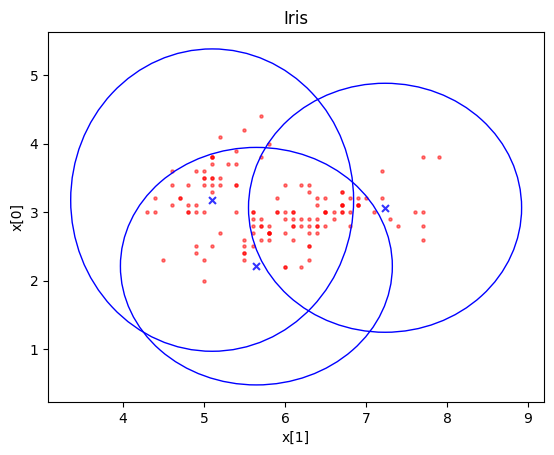

In [12]:
w = fuzz.get_layer("FuzzyRules").get_weights()


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], color='r', alpha=0.5, s=5)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], color='b', alpha=0.8, s=25, marker='x')
plt.show()